In [79]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') # style theme of plots

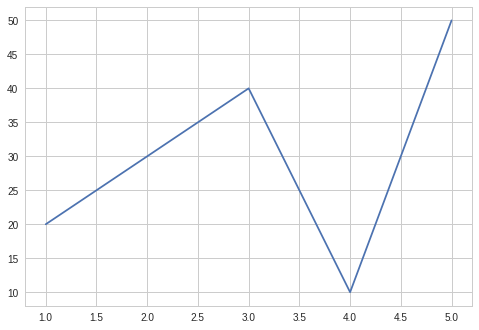

In [80]:
x = [1,2,3,4,5]
y = [20, 30, 40, 10, 50]
plt.plot(x, y); # if we don't use semicolon, there will be an empty array sign '[]' above the figure

### Recommended Way of Plotting

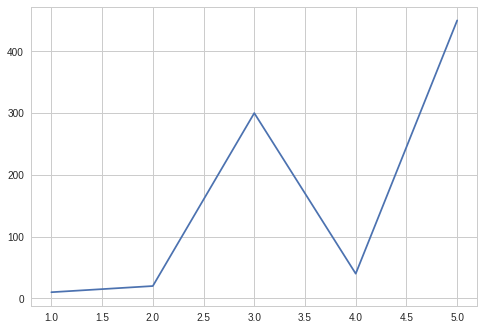

In [81]:
# Objext Oriented API
fig, ax = plt.subplots()
ax.plot(x, [10, 20, 300, 40, 450]);

## Matplotlib Workflow

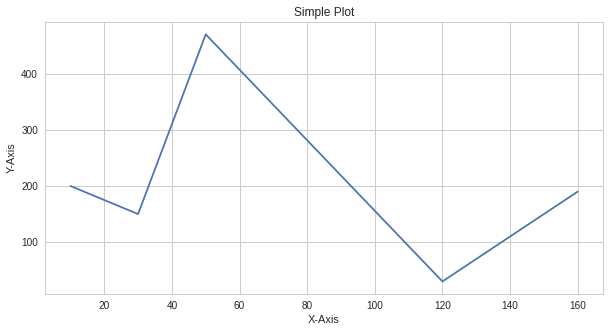

In [82]:
# Import Matplotlib
import matplotlib.pyplot as plt

# Prepare Data
x = [10, 30, 50, 120, 160]
y = [200, 150, 470, 30, 190]

# Setup Plot
fig, ax = plt.subplots(figsize=(10, 5))

# Customize Plot
ax.set(title="Simple Plot",
       xlabel="X-Axis",
       ylabel="Y-Axis")

# Plot Data
ax.plot(x, y);

## Plotting With NumPy Arrays
- Line Plot
- Scatter Plot
- Bar Plot
- Histogram
- Subplots

In [83]:
import numpy as np

In [84]:
x = np.linspace(0, 10, 100) # generate 100 evenly distributed numbers ranged from 0 to 10

### Line Plot

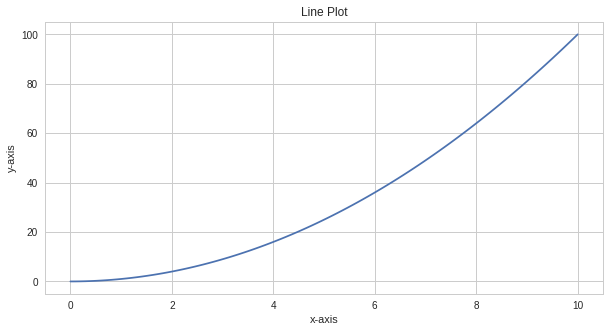

In [85]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set(title="Line Plot",
       xlabel="x-axis",
       ylabel="y-axis")

ax.plot(x, x**2); # by default plot = line plot

### Scatter Plot

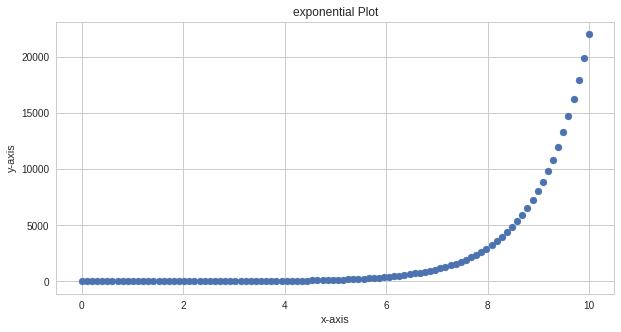

In [86]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set(title="exponential Plot",
       xlabel="x-axis",
       ylabel="y-axis")

ax.scatter(x, np.exp(x));

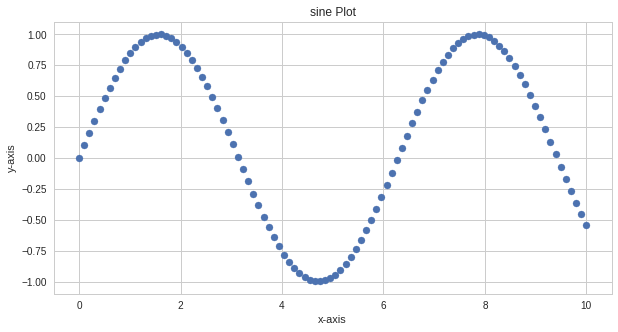

In [87]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set(title="sine Plot",
       xlabel="x-axis",
       ylabel="y-axis")

ax.scatter(x, np.sin(x)); # scatter

### Bar Plot

In [88]:
nut_butter_prices = {"Almond Butter": 10,
                     "Peanut Butter": 8,
                     "Cashew Butter": 14}

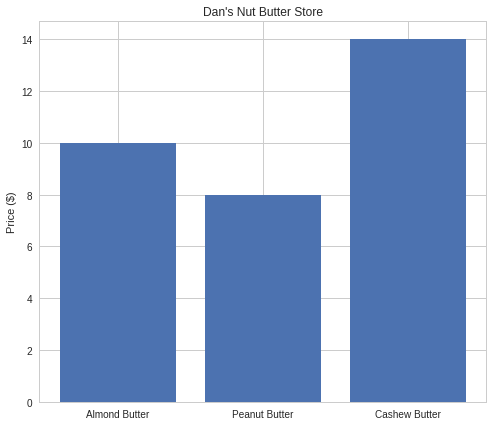

In [89]:
fig, ax = plt.subplots(figsize=(8, 7))

ax.set(title="Dan's Nut Butter Store",
       ylabel="Price ($)")

ax.bar(nut_butter_prices.keys(), height=nut_butter_prices.values()); # bar

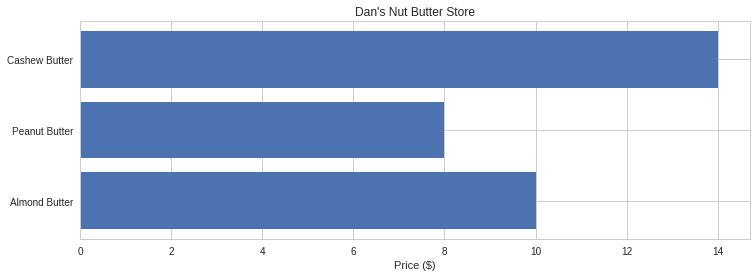

In [90]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.set(title="Dan's Nut Butter Store",
       xlabel="Price ($)")

# Horizontal Bar Plot
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));

## Histogram

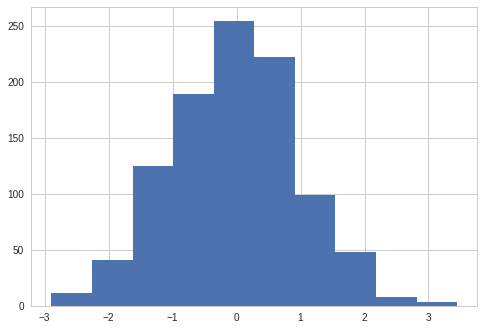

In [91]:
x = np.random.randn(1000) # 1000 samples normal distribution
fig, ax = plt.subplots()
ax.hist(x);

## Subplots

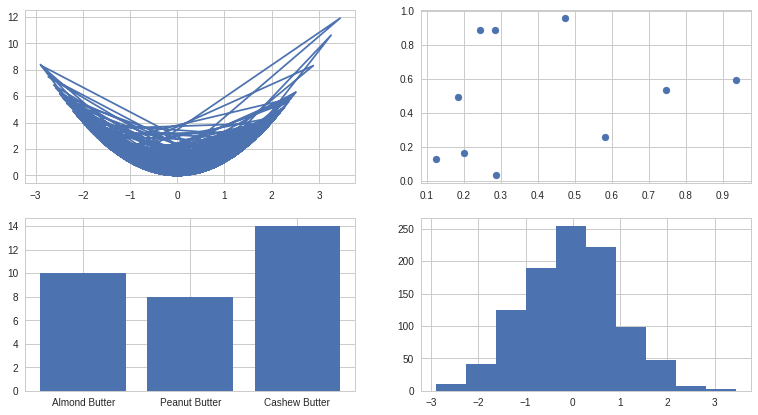

In [92]:
# Option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(13, 7))

ax1.plot(x, x**2)
ax2.scatter(np.random.random(10), np.random.random(10))
ax3.bar(nut_butter_prices.keys(), height=nut_butter_prices.values())
ax4.hist(x);

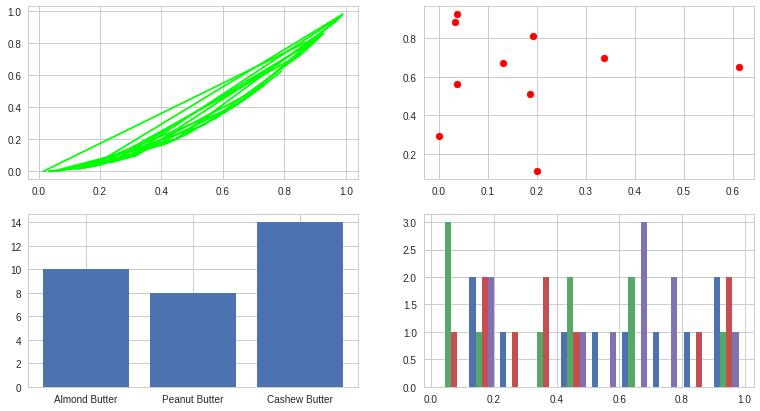

In [127]:
# Option 2
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(13, 7))

ax[0,0].plot(x, x**2, "lime")
ax[0,1].scatter(np.random.random(10), np.random.random(10), c="red")
ax[1,0].bar(nut_butter_prices.keys(), height=nut_butter_prices.values())
ax[1,1].hist(x);

## Plotting From Pandas DataFrame

In [94]:
import pandas as pd

In [95]:
car_sales = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales.csv")

In [96]:
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '') # Remove $ sign
car_sales["Price"] = car_sales["Price"].str[:-2] # remove last 2 digits

In [97]:
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()

car_sales["Sale Date"] = pd.date_range("1/1/2021", periods=len(car_sales))

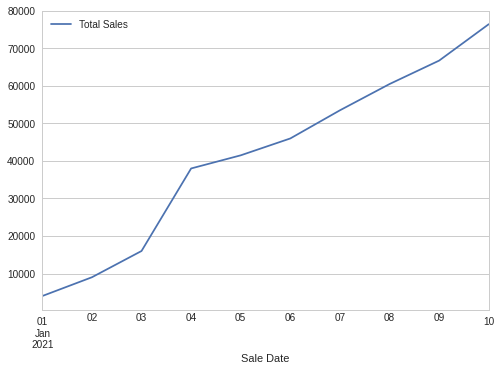

In [98]:
car_sales.plot(x="Sale Date", y="Total Sales");

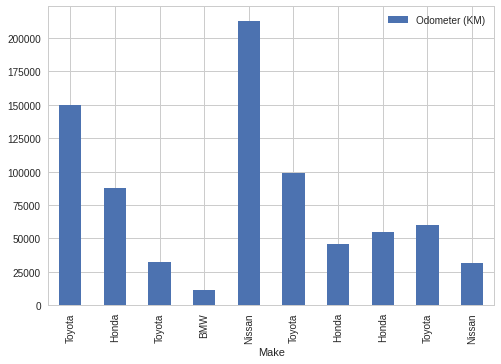

In [99]:
car_sales["Price"] = car_sales["Price"].astype("int")
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar");

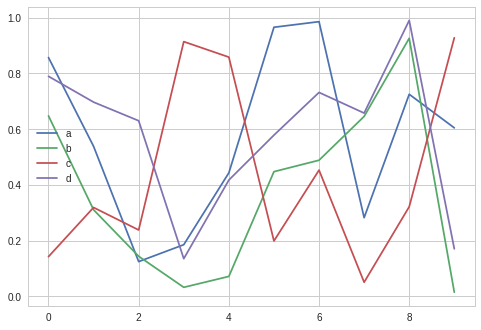

In [100]:
x = np.random.rand(10, 4)

df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])

df.plot();

In [101]:
heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")

In [102]:
over_50 = heart_disease[heart_disease["age"] > 50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


#### PyPlot Method

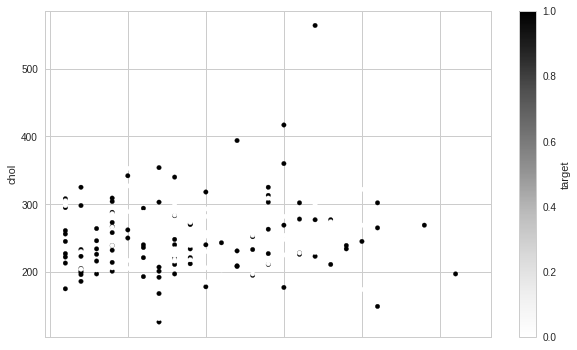

In [103]:
over_50.plot(x="age", y="chol", c="target", kind="scatter", figsize=(10, 6));

#### Object Oriented Method

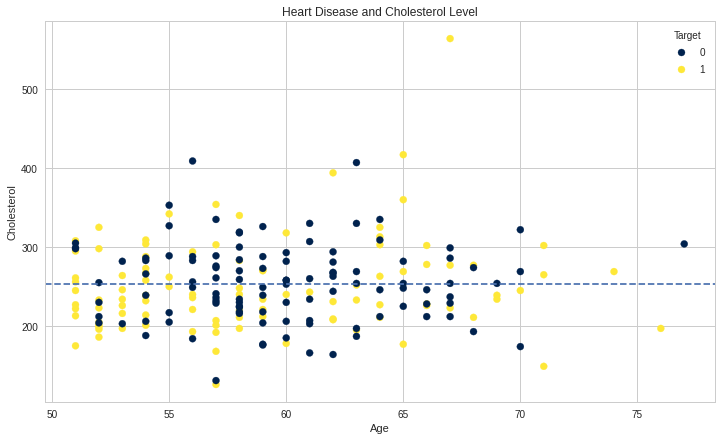

In [125]:
fig, ax = plt.subplots(figsize=(12, 7))

scatter = ax.scatter(x=over_50["age"], y=over_50["chol"], c=over_50["target"], cmap="cividis") # cmap is used for color scheme

ax.set(title="Heart Disease and Cholesterol Level",
       xlabel="Age",
       ylabel="Cholesterol")

ax.legend(*scatter.legend_elements(), title="Target") ## Add Legend

ax.axhline(over_50["chol"].mean(), linestyle="--"); # Add Horizontal Line

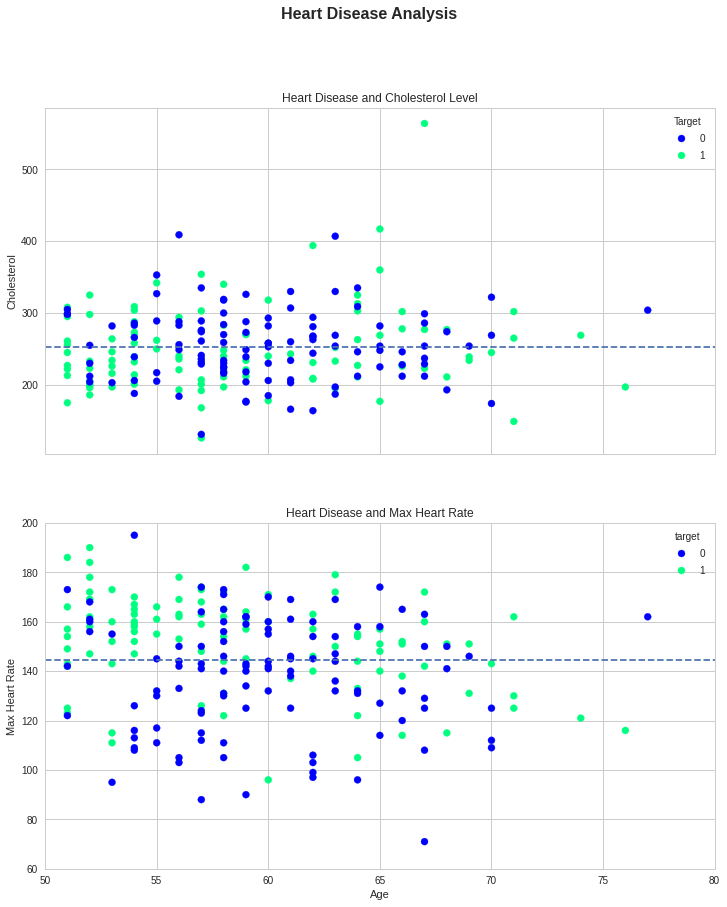

In [124]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(12, 14), sharex=True) # sharex is used to use one xlabel for all plots 

## Plot-1
plot1 = ax0.scatter(x=over_50["age"], y=over_50["chol"], c=over_50["target"], cmap="winter") # cmap is used for color scheme

ax0.set(title="Heart Disease and Cholesterol Level",
        ylabel="Cholesterol")

ax0.legend(*plot1.legend_elements(), title="Target")

ax0.axhline(over_50["chol"].mean(), linestyle="--")

ax0.set_xlim([50, 80]) # range of x-axis for both plots


# Plot-2
plot2 = ax1.scatter(x=over_50["age"], y=over_50["thalach"], c=over_50["target"], cmap="winter")

ax1.set(title="Heart Disease and Max Heart Rate",
        xlabel="Age",
        ylabel="Max Heart Rate")

ax1.legend(*plot2.legend_elements(), title="target")

ax1.axhline(over_50["thalach"].mean(), linestyle="--")

ax1.set_ylim([60,200]) # range of y-axis for plot-2

# Add title to the entire figure
fig.suptitle("Heart Disease Analysis", fontsize="16", fontweight="bold");